In [ ]:

import numpy as np
import pandas as pd

#importamos los CSVs
frecuencia_data = pd.read_csv('frecuencias_historicas_por_poliza.csv')
intensidad_data = pd.read_csv('experiencia_siniestral_por_poliza.csv')

In [ ]:
# EJERCICIO 1 : probabilidades frecuencia

def calcular_contadores_y_probabilidades(data, columnas):
    maximo = np.max(data.values) + 1
    resultados = {}

    for columna in columnas:
        # Contar ocurrencias de cada valor en la columna
        contadores = data[columna].value_counts().reindex(range(maximo), fill_value=0)
        # Calcular probabilidades
        probabilidades = contadores / contadores.sum()

        # Guardar resultados en un diccionario
        resultados[f'Contador_{columna}'] = contadores
        resultados[f'Probabilidad_{columna}'] = probabilidades

    return pd.DataFrame(resultados)

# Aplicar la función a las columnas A, B, y C
tabla_frecuencia = calcular_contadores_y_probabilidades(frecuencia_data, ['A', 'B', 'C'])

# Añadir columna de elementos
tabla_frecuencia.insert(0, 'Elemento', tabla_frecuencia.index)

tabla_frecuencia.head(16)

,Elemento,Contador_A,Probabilidad_A,Contador_B,Probabilidad_B,Contador_C,Probabilidad_C
0,0,2014,0.2014,114,0.0114,4197,0.4197
1,1,3328,0.3328,482,0.0482,3597,0.3597
2,2,2525,0.2525,1112,0.1112,1623,0.1623
3,3,1408,0.1408,1694,0.1694,457,0.0457
4,4,509,0.0509,1918,0.1918,105,0.0105
5,5,163,0.0163,1743,0.1743,19,0.0019
6,6,43,0.0043,1297,0.1297,2,0.0002
7,7,10,0.0010,792,0.0792,0,0.0000
8,8,0,0.0000,441,0.0441,0,0.0000
9,9,0,0.0000,227,0.0227,0,0.0000


In [ ]:
# EJERCICIO 1 : probabilidades intensidad

def calcular_probabilidades(lista_contadores):
    probabilidades = []
    for i in lista_contadores:
      probabilidades.append(i/sum(lista_contadores))
    return probabilidades

orden_columnas_intensidad = ['Monto Pagado','Poliza A', "Probabilidad_A", 'Poliza B', "Probabilidad_B",'Poliza C', "Probabilidad_C"]

intensidad_data["Probabilidad_A"] = calcular_probabilidades(intensidad_data["Poliza A"])
intensidad_data["Probabilidad_B"] = calcular_probabilidades(intensidad_data["Poliza B"])
intensidad_data["Probabilidad_C"] = calcular_probabilidades(intensidad_data["Poliza C"])

intensidad_data = intensidad_data[orden_columnas_intensidad]
intensidad_data

,Monto Pagado,Poliza A,Probabilidad_A,Poliza B,Probabilidad_B,Poliza C,Probabilidad_C
0,5000,610,0.0610,456,0.0456,551,0.0551
1,10000,77,0.0077,501,0.0501,959,0.0959
2,15000,262,0.0262,170,0.0170,174,0.0174
3,20000,628,0.0628,726,0.0726,523,0.0523
4,25000,274,0.0274,887,0.0887,526,0.0526
5,30000,424,0.0424,598,0.0598,342,0.0342
6,35000,263,0.0263,590,0.0590,876,0.0876
7,40000,547,0.0547,467,0.0467,366,0.0366
8,45000,24,0.0024,30,0.0030,41,0.0041
9,50000,275,0.0275,259,0.0259,193,0.0193


In [ ]:
# EJERCICIO 1: esperanza y varianza frecuencia

frecuencia_stats = frecuencia_data[['A', 'B', 'C']].agg(['mean', 'var']).T

frecuencia_stats.columns = ['Esperanza Frecuencia', 'Varianza Frecuencia']

frecuencia_stats

,Esperanza Frecuencia,Varianza Frecuencia
A,1.5781,1.545455
B,4.4965,4.441632
C,0.8741,0.878937


In [ ]:
# EJERCICIO 1: esperanza y varianza intensidad

montos = intensidad_data[['Poliza A', 'Poliza B', 'Poliza C']].multiply(intensidad_data['Monto Pagado'], axis=0)
#Axis=0 para que lo aplique a lo largo de las columnas, que lo haga fila por fila

# Calcular esperanza (promedio ponderado) para cada póliza
esperanza = montos.sum(axis=0) / intensidad_data[['Poliza A', 'Poliza B', 'Poliza C']].sum(axis=0)

# Calcular varianza ponderada para cada póliza
varianza = (
    (montos.subtract(esperanza, axis=1) ** 2).sum(axis=0)
    / intensidad_data[['Poliza A', 'Poliza B', 'Poliza C']].sum(axis=0)
)

# Crear un DataFrame con los resultados
intensidad_stats = pd.DataFrame({
    'Esperanza Intensidad': esperanza,
    'Varianza Intensidad': varianza
})

# Renombrar el índice para claridad
intensidad_stats.index = [f'Monto {poliza}' for poliza in ['Poliza A', 'Poliza B', 'Poliza C']]

# Mostrar resultados
intensidad_stats


,Esperanza Intensidad,Varianza Intensidad
Monto Poliza A,60739.0,3.510024e+12
Monto Poliza B,56457.0,3.233471e+12
Monto Poliza C,54197.5,2.977418e+12


In [ ]:
#EJERCICIO 1
def calcular_proporcion(data, poliza):
    return data[poliza] / sum(data[poliza])

In [ ]:
#EJERCICIO 1
def generar_diccionario_intensidad(intensidad_data, poliza):
        diccionario = {}
        proporciones = calcular_proporcion(intensidad_data, poliza)
        for idx, row in intensidad_data.iterrows():
            monto = float(row['Monto Pagado'])
            diccionario[monto] = float(proporciones[idx])
        return diccionario

# esto es el diccionario de frecuencias pero armado con los datos de la tabla
def generar_diccionario_frecuencia(tabla_frecuencia, poliza):
        diccionario = {}
        for idx, row in tabla_frecuencia.iterrows():
            contador = row[f'Contador_{poliza}']

            if contador:
                elemento = float(row['Elemento'])
                diccionario[elemento] = float(row[f'Probabilidad_{poliza}'])
        return diccionario

In [ ]:
#EJERCICIO 1
polizas_intensidad = ['Poliza A', 'Poliza B', 'Poliza C']
polizas_frecuencia = ['A', 'B', 'C']

# Generar los 6 diccionarios separados
diccionario_intensidad_A = generar_diccionario_intensidad(intensidad_data, 'Poliza A')
diccionario_intensidad_B = generar_diccionario_intensidad(intensidad_data, 'Poliza B')
diccionario_intensidad_C = generar_diccionario_intensidad(intensidad_data, 'Poliza C')

diccionario_frecuencia_A = generar_diccionario_frecuencia(tabla_frecuencia, 'A')
diccionario_frecuencia_B = generar_diccionario_frecuencia(tabla_frecuencia, 'B')
diccionario_frecuencia_C = generar_diccionario_frecuencia(tabla_frecuencia, 'C')


In [ ]:
# EJERCICIO 1: convoluciones de las polizas

# Funcion para redondear decimales
def round_dict_values(input_dict, decimals):
    return {key: round(value, decimals) for key, value in input_dict.items()}

def convolucion_discreta(dist1, dist2):

    convolution_result = {}

    for value1, prob1 in dist1.items():
        for value2, prob2 in dist2.items():

            combined_value = value1 * value2
            combined_prob = prob1 * prob2

            if combined_value in convolution_result:
                convolution_result[combined_value] += combined_prob
            else:
                convolution_result[combined_value] = combined_prob

    convolution_result = dict(sorted(convolution_result.items()))

    # Verificar la ley de cierre
    total_probability = sum(convolution_result.values())

    if not (0.99999 <= total_probability <= 1.00001):
        raise ValueError(f"La ley de cierre no se cumple. La suma de probabilidades es {total_probability}, no 1.0.")

    return round_dict_values(convolution_result,7)


convolucion_a = convolucion_discreta(diccionario_intensidad_A,diccionario_frecuencia_A)
convolucion_b = convolucion_discreta(diccionario_intensidad_B,diccionario_frecuencia_B)
convolucion_c = convolucion_discreta(diccionario_intensidad_C,diccionario_frecuencia_C)


resultado_convoluciones = pd.DataFrame({
    'convolucion A': convolucion_a,
    'convolucion B': convolucion_b,
    'convolucion C': convolucion_c
})

resultado_convoluciones.index.name = 'Monto'
resultado_convoluciones

,convolucion A,convolucion B,convolucion C
Monto,,,
0.0,0.201400,0.011400,0.419700
5000.0,0.020301,0.002198,0.019820
10000.0,0.017965,0.007485,0.043438
15000.0,0.017308,0.008544,0.008777
20000.0,0.025949,0.017816,0.034955
...,...,...,...
1330000.0,NaN,0.000010,NaN
1350000.0,NaN,0.000010,NaN
1400000.0,NaN,0.000007,NaN


In [ ]:
#EJERCICIO 1
#Calculo de la prima

import numpy as np
from pprint import pprint


intensidad_stats.index = ['A', 'B', 'C']

# Calcular la esperanza de siniestros
esperanza_siniestros = frecuencia_stats["Esperanza Frecuencia"] * intensidad_stats["Esperanza Intensidad"]


# Calcular la varianza de siniestros
varianza_siniestros = (
    frecuencia_stats['Esperanza Frecuencia'] * intensidad_stats['Varianza Intensidad'] +
    frecuencia_stats['Varianza Frecuencia'] * (intensidad_stats['Esperanza Intensidad'] ** 2)
)

# Calculo la desviación estándar de los riesgos
desviacion_estandar_riesgos = np.sqrt(varianza_siniestros)

#calculo la prima
prima = esperanza_siniestros + 0.34576566 * desviacion_estandar_riesgos

resultados_primas = pd.DataFrame({
    'Esperanza Siniestros': esperanza_siniestros,
    'Varianza Siniestros': varianza_siniestros,
    'Desviación Estándar Riesgos': desviacion_estandar_riesgos,
    'Prima': prima
})


resultados_primas

,Esperanza Siniestros,Varianza Siniestros,Desviación Estándar Riesgos,Prima
A,95852.21590,5.544870e+12,2.354755e+06,9.100455e+05
B,253858.90050,1.455346e+13,3.814900e+06,1.572920e+06
C,47374.03475,2.605143e+12,1.614045e+06,6.054555e+05


In [ ]:
#Ejercicio 2
#armo un data frame con las probabilidades de cada region

data = {
    'Póliza': ['(C) Centro','(A) NOA', '(B) Cuyo'],
    'Probabilidad': [0.52, 0.31, 0.17]
}

df = pd.DataFrame(data)

df['Acumulada'] = df['Probabilidad'].cumsum()

df


,Póliza,Probabilidad,Acumulada
0,(C) Centro,0.52,0.52
1,(A) NOA,0.31,0.83
2,(B) Cuyo,0.17,1.00


In [ ]:
#Ejercicio 2
#genero los 100 numeros aleatorios
numeros_aleatorios = np.random.uniform(0, 1, 100)
pprint(numeros_aleatorios)

array([0.25479471, 0.47531945, 0.9379814 , 0.04732093, 0.45469112,
       0.43698719, 0.84494501, 0.21169616, 0.03632207, 0.13142982,
       0.29089703, 0.04825221, 0.55685151, 0.28780397, 0.52528888,
       0.19596147, 0.33514487, 0.13706686, 0.11704776, 0.26487416,
       0.65977538, 0.83429406, 0.13229549, 0.06710147, 0.37143698,
       0.2792048 , 0.6619184 , 0.36110835, 0.49206083, 0.14791391,
       0.69741157, 0.84874045, 0.56935203, 0.91101903, 0.51847051,
       0.75719551, 0.85701092, 0.27273877, 0.77818298, 0.46497261,
       0.6131569 , 0.41092754, 0.13393636, 0.38203939, 0.05989891,
       0.1938676 , 0.3103352 , 0.79201037, 0.04933878, 0.65371533,
       0.20679258, 0.0591226 , 0.00811793, 0.76790357, 0.73022455,
       0.80850284, 0.88994884, 0.01965181, 0.30119855, 0.71823327,
       0.54747904, 0.45468985, 0.66681222, 0.68172792, 0.13247404,
       0.43669231, 0.50506654, 0.44176335, 0.48726141, 0.41215313,
       0.19427975, 0.93798729, 0.59110974, 0.97500959, 0.06425

In [ ]:
#Ejercicio 2
#armo la regla de decision
probalidad_region = pd.DataFrame(numeros_aleatorios, columns=['numeros_aleatorios'])

x = np.empty(100, dtype=object)

def region_asignada(numeros_aleatorios, df,x):
  global contador_centro
  global contador_noa
  global contador_cuyo
  contador_centro = 0
  contador_noa = 0
  contador_cuyo = 0
  for i in range(len(numeros_aleatorios)):
    if numeros_aleatorios[i] <= 0.52:
        x[i] = 'Centro'
        contador_centro += 1

    if 0.52 < numeros_aleatorios[i] <= 0.83:
            x[i] = 'NOA'
            contador_noa += 1

    if 0.83 < numeros_aleatorios[i] <= 1:
            x[i] = 'Cuyo'
            contador_cuyo += 1

  print(f"cantidad de centro: {contador_centro}")
  print(f"cantidad de noa: {contador_noa}")
  print(f"cantidad de cuyo: {contador_cuyo}")

  return x


probalidad_region['Region correspondiente'] = region_asignada(numeros_aleatorios, df,x)

probalidad_region


cantidad de centro: 61
cantidad de noa: 24
cantidad de cuyo: 15


,numeros_aleatorios,Region correspondiente
0,0.254795,Centro
1,0.475319,Centro
2,0.937981,Cuyo
3,0.047321,Centro
4,0.454691,Centro
...,...,...
95,0.008012,Centro
96,0.717869,NOA
97,0.252364,Centro
98,0.893440,Cuyo


In [ ]:
#EJERCICIO 3: calcular prima estimada total de la cartera
contadores = [contador_noa,contador_cuyo,contador_centro]

def prima_estimada_total(prima,contadores):
    return  sum(contadores * prima)

prima_estimada_total(prima=prima,contadores=contadores)


82367682.11310014

In [ ]:
#EJERCICIO 4
resultados_regiones = pd.DataFrame({
  'total_NOA': resultado_convoluciones.index * contador_noa,
  'probalidad_NOA': resultado_convoluciones['convolucion A'].values,
  'total_CUYO': resultado_convoluciones.index * contador_cuyo,
  'probalidad_CUYO': resultado_convoluciones['convolucion B'].values,
  'total_CENTRO': resultado_convoluciones.index * contador_centro,
  'probalidad_CENTRO': resultado_convoluciones['convolucion C'].values
})


def generar_diccionario(resultados_regiones,region):
        diccionario = {}
        for idx, row in resultados_regiones.iterrows():
            probabilidad = row[f'probalidad_{region}']
            if probabilidad > 0:
              monto = row[f'total_{region}']
              diccionario[monto] = row[f'probalidad_{region}']
        return diccionario

def distribucion_cartera(dist1, dist2):

    convolution_result = {}

    for value1, prob1 in dist1.items():
        for value2, prob2 in dist2.items():

              combined_value = value1 + value2
              combined_prob = prob1 * prob2

              if combined_value in convolution_result:
                  convolution_result[combined_value] += combined_prob
              else:
                  convolution_result[combined_value] = combined_prob

    convolution_result = dict(sorted(convolution_result.items()))

    # Verificar la ley de cierre
    total_probability = sum(convolution_result.values())

    if not (0.99999 <= total_probability <= 1.00001):
        raise ValueError(f"La ley de cierre no se cumple. La suma de probabilidades es {total_probability}, no 1.0.")

    return round_dict_values(convolution_result,14)

dict_noa = generar_diccionario(resultados_regiones,'NOA')
dict_centro = generar_diccionario(resultados_regiones,'CENTRO')
dict_cuyo = generar_diccionario(resultados_regiones,'CUYO')

conv_noa_centro = distribucion_cartera(dict_noa,dict_centro)

convolucion_NCC = distribucion_cartera(conv_noa_centro,dict_cuyo)

resultado_cartera = pd.DataFrame({
  "convolucion NCC": convolucion_NCC
})

resultado_cartera = resultado_cartera.reset_index()
resultado_cartera.columns = ['Siniestro', 'Probabilidad Total Cartera']

resultado_cartera

,Siniestro,Probabilidad Total Cartera
0,0.0,9.636144e-04
1,75000.0,1.857832e-04
2,120000.0,9.713080e-05
3,150000.0,6.327312e-04
4,195000.0,1.872665e-05
...,...,...
12940,74220000.0,0.000000e+00
12941,74400000.0,1.000000e-14
12942,74775000.0,1.000000e-14
12943,75060000.0,1.000000e-14


In [ ]:
#EJERCICIO 4
#Armamos la nueva matriz con resultados = pi - siniestro

prima_value = prima_estimada_total(prima=prima,contadores=contadores)

resultado_cartera['Monto'] = prima_value - resultado_cartera['Siniestro']

resultado_cartera

,Siniestro,Probabilidad Total Cartera,Monto
0,0.0,9.636144e-04,8.236768e+07
1,75000.0,1.857832e-04,8.229268e+07
2,120000.0,9.713080e-05,8.224768e+07
3,150000.0,6.327312e-04,8.221768e+07
4,195000.0,1.872665e-05,8.217268e+07
...,...,...,...
12940,74220000.0,0.000000e+00,8.147682e+06
12941,74400000.0,1.000000e-14,7.967682e+06
12942,74775000.0,1.000000e-14,7.592682e+06
12943,75060000.0,1.000000e-14,7.307682e+06


In [ ]:
#Ejercicio 5. Probabilidad de una perdida mayor o igual a 3 millones
# P(x<= -3000000)

def probabilidad_perdida(valor):
  probabilidad_perdida = 0
  for i in range(len(resultado_cartera)):
    if resultado_cartera.iloc[i]['Monto'] <= valor:
      probabilidad_perdida += resultado_cartera.loc[i, 'Probabilidad Total Cartera']
  return probabilidad_perdida

probabilidad_perdida(-3000000)

0

In [ ]:
#Ejercicio 6
!pip install fitter

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,5.492814e-16,3905.538325,3934.077101,inf,0.013048,3.225845e-15
norm,6.827170e-15,4491.341378,4510.367229,inf,0.066460,0.000000e+00
t,3.878179e-14,3997.972018,4026.510795,inf,0.497850,0.000000e+00
lognorm,1.218768e-13,4465.890008,4494.428785,inf,0.962310,0.000000e+00


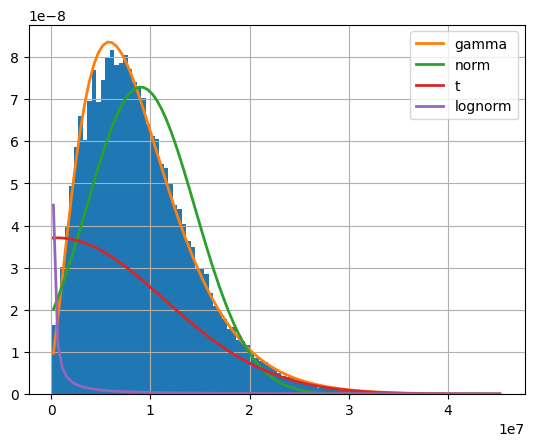

In [ ]:
#EJERCICIO 6
import pandas as pd
from fitter import Fitter

valores = list(resultado_cartera['Siniestro'])
probabilidades = list(resultado_cartera['Probabilidad Total Cartera'])

probabilidades_cambio = np.array(probabilidades) / np.sum(probabilidades)

tamaño_muestra = 100000

muestra = np.random.choice(valores, size=tamaño_muestra, p=probabilidades_cambio)

f = Fitter(muestra, distributions=['gamma', 'norm', 'lognorm','t'])
f.fit()

# Mostrar el resumen de las distribuciones ajustadas
f.summary()

In [ ]:
#Ejercicio 7
#genero los numeros aleatorios
numeros_aleatorios_7 = np.random.uniform(0, 1, 50000)
print(numeros_aleatorios_7)

[0.56642792 0.45459421 0.53194834 ... 0.75628835 0.3825806  0.65944289]


In [ ]:
#Ejercicio 7
#armo un dataframe con las probabilidades de cada region

data = {
    'Region': ['(C) Centro','(A) NOA', '(B) Cuyo'],
    'Probabilidad': [0.52, 0.31, 0.17]
}

df = pd.DataFrame(data)

df['Acumulada'] = df['Probabilidad'].cumsum()
df

,Region,Probabilidad,Acumulada
0,(C) Centro,0.52,0.52
1,(A) NOA,0.31,0.83
2,(B) Cuyo,0.17,1.00


In [ ]:
#Ejercicio 7
#armo la regla de decision
probabilidad_region_7 = pd.DataFrame(numeros_aleatorios_7, columns=['numeros_aleatorios'])

def region_asignada(numeros_aleatorios, df):
  x = np.empty(50000, dtype=object)
  global contador_centro_7
  global contador_noa_7
  global contador_cuyo_7
  contador_centro_7 = 0
  contador_noa_7 = 0
  contador_cuyo_7 = 0
  for i in range(len(numeros_aleatorios)):
    if numeros_aleatorios[i] <= 0.52:
        x[i] = 'Centro'
        contador_centro_7 += 1

    if 0.52 < numeros_aleatorios[i] <= 0.83:
            x[i] = 'NOA'
            contador_noa_7 += 1

    if 0.83 < numeros_aleatorios[i] <= 1:
            x[i] = 'Cuyo'
            contador_cuyo_7 += 1

  print(f"cantidad de centro: {contador_centro_7}")
  print(f"cantidad de noa: {contador_noa_7}")
  print(f"cantidad de cuyo: {contador_cuyo_7}")
  return x

probabilidad_region_7['Region correspondiente'] = region_asignada(numeros_aleatorios_7, df)

probabilidad_region_7

cantidad de centro: 25944
cantidad de noa: 15375
cantidad de cuyo: 8681


,numeros_aleatorios,Region correspondiente
0,0.566428,NOA
1,0.454594,Centro
2,0.531948,NOA
3,0.774406,NOA
4,0.230980,Centro
...,...,...
49995,0.813105,NOA
49996,0.174283,Centro
49997,0.756288,NOA
49998,0.382581,Centro


In [ ]:
#EJERCICIO 7: calcular prima estimada total de la cartera
contadores_7 = [contador_noa_7,contador_cuyo_7,contador_centro_7]

result = prima_estimada_total(prima=prima,contadores=contadores_7)

result

43354408083.09225

In [ ]:
resultados_regiones_7 = pd.DataFrame({
  'total_NOA': resultado_convoluciones.index * contador_noa_7,
  'probalidad_NOA': resultado_convoluciones['convolucion A'].values,
  'total_CUYO': resultado_convoluciones.index * contador_cuyo_7,
  'probalidad_CUYO': resultado_convoluciones['convolucion B'].values,
  'total_CENTRO': resultado_convoluciones.index * contador_centro_7,
  'probalidad_CENTRO': resultado_convoluciones['convolucion C'].values
})

dict_noa_7 = generar_diccionario(resultados_regiones_7,'NOA')
dict_centro_7 = generar_diccionario(resultados_regiones_7,'CENTRO')
dict_cuyo_7 = generar_diccionario(resultados_regiones_7,'CUYO')

conv_noa_centro_7 = distribucion_cartera(dict_noa_7,dict_centro_7)

convolucion_NCC_7 = distribucion_cartera(conv_noa_centro_7,dict_cuyo_7)

resultado_cartera_7 = pd.DataFrame({
  "convolucion NCC": convolucion_NCC_7
})

resultado_cartera_7 = resultado_cartera_7.reset_index()
resultado_cartera_7.columns = ['Siniestro', 'Probabilidad Total Cartera']


resultado_cartera_7

,Siniestro,Probabilidad Total Cartera
0,0.000000e+00,9.636144e-04
1,4.340500e+07,1.857832e-04
2,7.687500e+07,9.713080e-05
3,8.681000e+07,6.327312e-04
4,1.202800e+08,1.872665e-05
...,...,...
690685,3.848230e+10,1.000000e-14
690686,3.857208e+10,1.000000e-14
690687,3.869932e+10,1.000000e-14
690688,3.881228e+10,1.000000e-14


In [ ]:
#Armamos el nuevo Dataframe con resultados = pi - siniestro

prima_value_7 = result

resultado_cartera_7['Monto'] = prima_value_7 - resultado_cartera_7['Siniestro']

resultado_cartera_7

,Siniestro,Probabilidad Total Cartera,Monto
0,0.000000e+00,9.636144e-04,4.335441e+10
1,4.340500e+07,1.857832e-04,4.331100e+10
2,7.687500e+07,9.713080e-05,4.327753e+10
3,8.681000e+07,6.327312e-04,4.326760e+10
4,1.202800e+08,1.872665e-05,4.323413e+10
...,...,...,...
690685,3.848230e+10,1.000000e-14,4.872108e+09
690686,3.857208e+10,1.000000e-14,4.782328e+09
690687,3.869932e+10,1.000000e-14,4.655083e+09
690688,3.881228e+10,1.000000e-14,4.542133e+09


In [ ]:
resultado_esperado = resultado_cartera_7['Monto'].agg(['mean'])
resultado_esperado

,Monto
mean,2.902007e+10
